# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) helps in understanding the dataset through various techniques like visualization, summary statistics, and feature relationships. 

Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [16]:
Sdf = pd.read_csv(r"D:\Datasets\Csv_excel_txt\Salary_EDA.csv")
Sdf.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0


# EDA Techniques
1. Checking Basic Information

In [18]:
Sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               371 non-null    object 
 2   Education Level      372 non-null    object 
 3   Job Title            370 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               372 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


2. Checking Missing values

In [21]:
Sdf.isnull().sum()

Age                    2
Gender                 4
Education Level        3
Job Title              5
Years of Experience    2
Salary                 3
dtype: int64

In [23]:
Sdf.dropna(inplace = True)

In [25]:
Sdf.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

3. Summary Statistics

Using the IQR Method (Interquartile Range)
We use the 1.5 × IQR rule:

- Lower Bound = Q1−1.5×IQR
- Upper Bound = Q3+1.5×IQR
- 
Any data point below the lower bound or above the upper bound is an outlier.

In [28]:
Sdf.describe(include = 'all')

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,366.000000,366,366,366,366.000000,366.000000
unique,NaN,2,3,169,NaN,NaN
top,NaN,Male,Bachelor's,Director of Marketing,NaN,NaN
freq,NaN,189,220,12,NaN,NaN
mean,37.459016,NaN,NaN,NaN,10.045082,100492.759563
std,6.962303,NaN,NaN,NaN,6.517102,48013.732434
min,23.000000,NaN,NaN,NaN,0.000000,350.000000
25%,32.000000,NaN,NaN,NaN,4.000000,56250.000000
50%,36.000000,NaN,NaN,NaN,9.000000,95000.000000
75%,44.000000,NaN,NaN,NaN,15.000000,140000.000000


Final Observations:

✅ Most employees are aged between 32 and 44 years.

✅ Experience varies widely, but most have 4 to 15 years.

✅ Salary has a large variation; some extreme low values may be errors or part-time roles.

✅ More employees have a Bachelor’s degree compared to Master’s/PhD.

✅ Gender distribution is fairly balanced, with a slight Male majority.

✅ Jobs are diverse, with no single job title dominating.



4. Visualization
   
4.1. Histogram

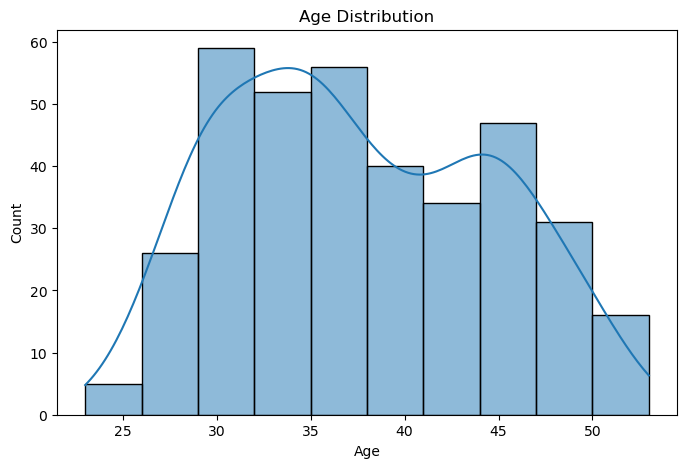

In [40]:
#Visualizing Age Distribution:
plt.figure(figsize=(8,5))
sns.histplot(Sdf['Age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()


Observations:
- The age values range from 23 to 53 years.
- There is a slight right skew (positively skewed), meaning a few employees are older (50+ years).
- No extreme outliers are visible, as there is no long tail on either side.
- The company primarily employs mid-career professionals (30-45 years old).
- Few young employees (below 25 years) and few older employees (above 50 years).

4.2. Heatmap  (Numerical data)

In [49]:
#Filter numerical data
Sdf_num = Sdf.select_dtypes(include=['number'])
Sdf_num.head()

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,36.0,7.0,60000.0


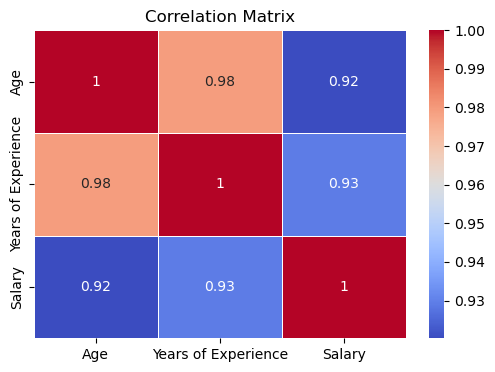

In [51]:
plt.figure(figsize=(6,4))
sns.heatmap(Sdf_num.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Observations:
Age and Experience have good correlation

4.3. Boxplot

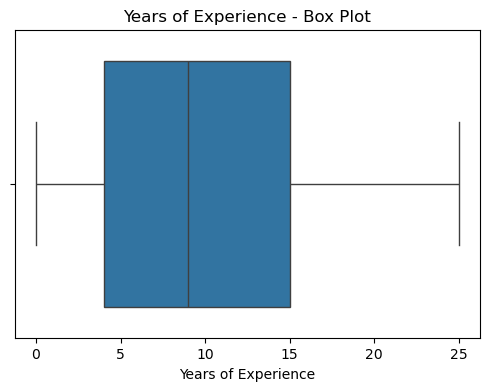

In [57]:
plt.figure(figsize=(6,4))
sns.boxplot(x=Sdf['Years of Experience'])
plt.title("Years of Experience - Box Plot")
plt.show()

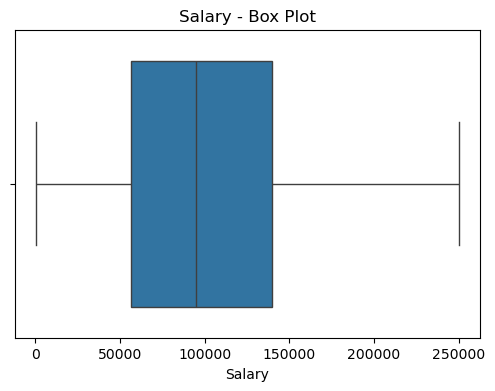

In [65]:
plt.figure(figsize=(6,4))
sns.boxplot(x=Sdf["Salary"])
plt.title("Salary - Box Plot")
plt.show()

4.4. Countplot

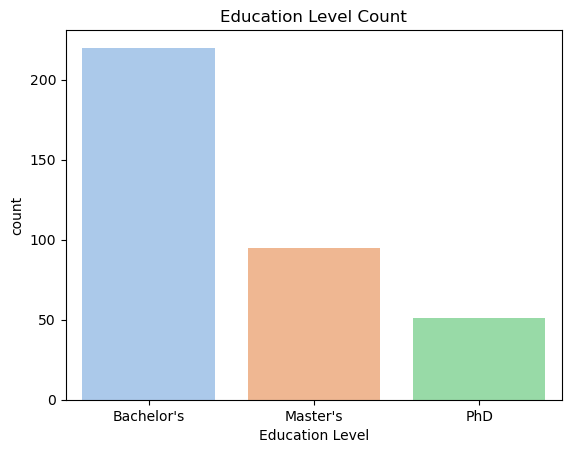

In [127]:
sns.countplot(x=Sdf['Education Level'], hue = Sdf['Education Level'], palette='pastel')
plt.title("Education Level Count")
plt.show()

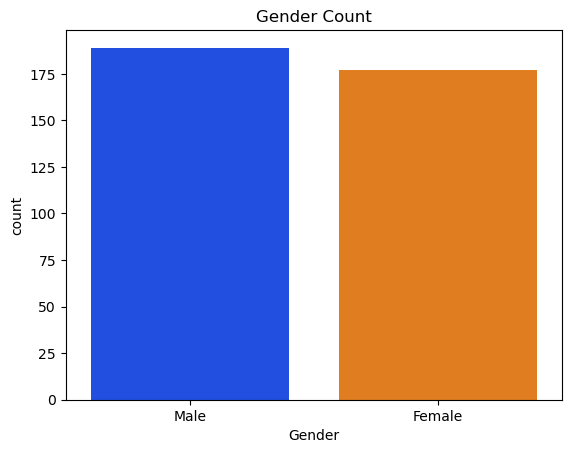

In [141]:
sns.countplot(x=Sdf['Gender'], hue=Sdf['Gender'], palette='bright', legend=False)
plt.title("Gender Count")
plt.show()

4.5. Pair plot

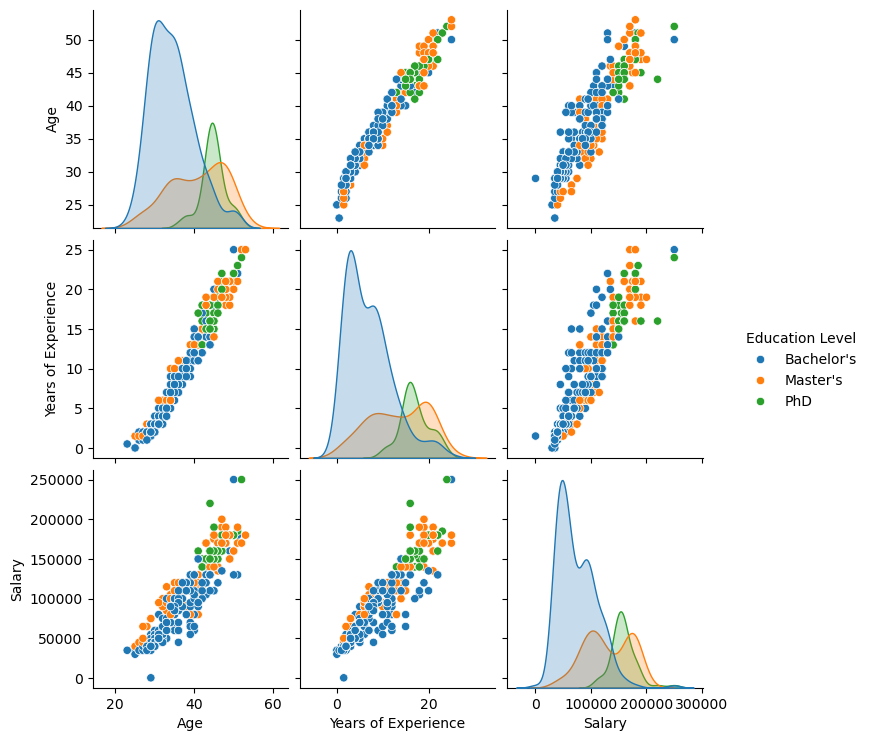

In [85]:
sns.pairplot(Sdf, hue='Education Level')
plt.show()

5. Grouping and Aggregation

1. Grouping by Education level

In [94]:
Sdf.groupby('Education Level')['Salary'].mean()

Education Level
Bachelor's     74683.409091
Master's      129473.684211
PhD           157843.137255
Name: Salary, dtype: float64

In [96]:
Sdf.groupby('Education Level')['Age'].mean()

Education Level
Bachelor's    34.368182
Master's      40.715789
PhD           44.725490
Name: Age, dtype: float64

In [98]:
Sdf.groupby('Education Level')['Years of Experience'].mean()

Education Level
Bachelor's     6.970455
Master's      13.421053
PhD           17.019608
Name: Years of Experience, dtype: float64

2. Segmentation

In [113]:
Fem_Master = Sdf[(Sdf['Gender'] == 'Female') & (Sdf['Education Level'] == "Master's")]

In [115]:
Fem_Master['Salary'].mean()

121020.40816326531

In [111]:
Exp20 = Sdf[Sdf['Years of Experience'] > 20]

In [117]:
Exp20['Salary'].mean()

175892.85714285713

3. Aggregation

In [122]:
Sdf.groupby('Education Level').agg({'Age': ['count', 'mean']})

Age           
                count       mean
Education Level                 
Bachelor's        220  34.368182
Master's           95  40.715789
PhD                51  44.725490

Pivot

In [125]:
Sdf.pivot_table(values='Years of Experience', index='Education Level', columns='Gender', aggfunc='mean')

Gender,Female,Male
Education Level,,
Bachelor's,6.990196,6.95339
Master's,12.877551,14.00000
PhD,16.730769,17.32000
